# Assessment 2
# Monitoring BBC podcasts

# Read jaon file

In [107]:
%%bash

head 20160130_013000_the_world_this_week.asr.json
pip install ijson


[{
 "speakers": [
  "s0002",
  "s0003",
  "s0001"
 ],
 "classes": [
  "speech"
 ],
 "segments": [


In [108]:
import matplotlib.pyplot as plt
import plotly 
import seaborn as sns
plotly.tools.set_credentials_file(username='LuvianChen', api_key='HplTTtmuV86KzNkp0Nv2')

In [109]:
%%bash

grep -E '^ {1,5}"' 20160130_013000_the_world_this_week.asr.json

 "speakers": [
  "s0002",
  "s0003",
  "s0001"
 "classes": [
  "speech"
 "segments": [
   "classId": "speech",
   "spokenWords": [
     "wordEnd": 0.41999999999999998,
     "wordId": "HELLO",
     "wordStart": 0.040000000000000001,
     "wordConfidence": 1.0
     "wordEnd": 0.57999999999999996,
     "wordId": "I'M",
     "wordStart": 0.41999999999999998,
     "wordConfidence": 1.0
     "wordEnd": 0.88,
     "wordId": "SHONE",
     "wordStart": 0.56999999999999995,
     "wordConfidence": 0.97999999999999998
     "wordEnd": 1.23,
     "wordId": "LIKE",
     "wordStart": 0.89000000000000001,
     "wordConfidence": 0.97999999999999998
     "wordEnd": 1.5800000000000001,
     "wordId": "WELCOME",
     "wordStart": 1.23,
     "wordConfidence": 1.0
     "wordEnd": 1.6699999999999999,
     "wordId": "TO",
     "wordStart": 1.5800000000000001,
     "wordConfidence": 1.0
     "wordEnd": 1.77,
     "wordId": "THE",
     "wordStart": 1.6699999999999999,
     "wordConfidence": 1.0
     "wordEnd": 2

In [110]:
import pandas as pd
data = pd.read_json('20160130_013000_the_world_this_week.asr.json')

In [111]:
words = data['segments'][0]

In [112]:
word_list = []
long_list  = []
speaker_list = []
new_frame = pd.DataFrame()
for i in words:
    for word in i['spokenWords']:
        word_list.append(word['wordId'])
        long_list.append(word['wordEnd'] - word['wordStart'])
        speaker_list.append(i['speakerId'])
    #print(i['spokenWords'][0]['wordId'])
new_frame['word'] = word_list
new_frame['long'] = long_list
new_frame['speaker'] = speaker_list

In [113]:
new_frame.to_csv('speech20160130.csv')

In [114]:
print(new_frame)

          word  long speaker
0        HELLO  0.38   s0002
1          I'M  0.16   s0002
2        SHONE  0.31   s0002
3         LIKE  0.34   s0002
4      WELCOME  0.35   s0002
5           TO  0.09   s0002
6          THE  0.10   s0002
7      PROGRAM  0.44   s0002
8         THAT  0.14   s0002
9        TELLS  0.31   s0002
10         YOU  0.14   s0002
11         HOW  0.32   s0002
12         THE  0.12   s0002
13       WORLD  0.28   s0002
14     CHANGED  0.66   s0002
15          IN  0.10   s0002
16         THE  0.09   s0002
17        PAST  0.36   s0002
18       SEVEN  0.28   s0002
19        DAYS  0.43   s0002
20         THE  0.14   s0002
21        WELL  0.36   s0002
22        THIS  0.31   s0002
23        WEEK  0.36   s0002
24        THIS  0.22   s0002
25         WAS  0.19   s0002
26         THE  0.12   s0002
27        WEAK  0.27   s0002
28       QUITE  0.22   s0002
29      BRAZIL  0.57   s0002
...        ...   ...     ...
3984        US  0.15   s0002
3985         A  0.10   s0002
3986    B.B.C.

In [115]:
import pandas as pd
data = pd.read_csv("speech20160130.csv")
import numpy as np

In [116]:
data

,Unnamed: 0,word,long,speaker
0,0,HELLO,0.38,s0002
1,1,I'M,0.16,s0002
2,2,SHONE,0.31,s0002
3,3,LIKE,0.34,s0002
4,4,WELCOME,0.35,s0002
5,5,TO,0.09,s0002
6,6,THE,0.10,s0002
7,7,PROGRAM,0.44,s0002
8,8,THAT,0.14,s0002
9,9,TELLS,0.31,s0002


In [117]:
a=pd.value_counts(data.loc[data.speaker=='s0003'].word.values).to_frame()
a

,0
THE,39
OF,27
A,26
AND,25
TO,21
IS,19
THAT,19
IT,14
THIS,13
BEEN,9


In [118]:
#tdata = data.drop_duplicates(subset='word', keep="first", inplace=False)
#tdata

In [136]:
speaker1 = data[data['speaker']=='s0001']
speaker2 = data[data['speaker']=='s0002']
speaker3 = data[data['speaker']=='s0003']

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Create a dataframe
df = pd.DataFrame({'word':list(map(chr, range(65, 85))), 'long':np.random.uniform(size=20) })
 
# Reorder it following the values:
ordered_df = df.sort_values(by='long')
my_range=range(1,len(df.index)+1)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['long'], color='skyblue')
plt.plot(ordered_df['long'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['word'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('long')
plt.ylabel('word')


In [137]:
word_count = []
for t in speaker1['word']:
    counter = 0
    for w in speaker1['word']:
        if t == w:
            counter = counter + 1
    word_count.append(counter)
speaker1['2016count'] = word_count
speaker1

/Users/luvianluvian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Unnamed: 0,word,long,speaker,2016count
666,666,IT'S,0.21,s0001,3
667,667,THE,0.09,s0001,46
668,668,SYMPTOMS,0.53,s0001,1
669,669,OF,0.14,s0001,30
670,670,THIS,0.41,s0001,3
671,671,VIRUS,0.39,s0001,1
672,672,OF,0.20,s0001,30
673,673,BEANS,0.30,s0001,1
846,846,BABIES,0.51,s0001,1
847,847,BORN,0.37,s0001,1


In [139]:
word_count = []
for t in speaker2['word']:
    counter = 0
    for w in speaker2['word']:
        if t == w:
            counter = counter + 1
    word_count.append(counter)
speaker2['2016count'] = word_count
speaker2

/Users/luvianluvian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Unnamed: 0,word,long,speaker,2016count
0,0,HELLO,0.38,s0002,1
1,1,I'M,0.16,s0002,3
2,2,SHONE,0.31,s0002,1
3,3,LIKE,0.34,s0002,5
4,4,WELCOME,0.35,s0002,1
5,5,TO,0.09,s0002,58
6,6,THE,0.10,s0002,165
7,7,PROGRAM,0.44,s0002,3
8,8,THAT,0.14,s0002,49
9,9,TELLS,0.31,s0002,2


In [140]:
word_count = []
for t in speaker3['word']:
    counter = 0
    for w in speaker3['word']:
        if t == w:
            counter = counter + 1
    word_count.append(counter)
speaker3['2016count'] = word_count
speaker3

/Users/luvianluvian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Unnamed: 0,word,long,speaker,2016count
50,50,THE,0.20,s0003,39
51,51,LEVEL,0.41,s0003,2
52,52,OF,0.13,s0003,27
53,53,CONCERN,0.49,s0003,3
54,54,IS,0.16,s0003,19
55,55,HIGH,0.28,s0003,2
57,57,QUESTIONS,0.56,s0003,2
58,58,OF,0.15,s0003,27
59,59,MILD,0.49,s0003,2
84,84,YOU,0.14,s0003,7


import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
word2=word[word['Trialref'>0]].sort_values(by='Trialref',ascending=False)
print(sentence2.index)
as+sns.barplot(x=word.index, y=word['Trial'],palette='Set3')
plt.show()

In [141]:
df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="2016count", y="long", data=data, fit_reg=False, hue='speaker', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
plt.show()


KeyError: "['speaker1'] not in index"

# Creat new dataframe

In [131]:
t2data = data[(data['2016count'] > 6) & (data['2016count'] < 17)]        
t2data.sort_values(by="2016count",inplace=True)
t2data

/Users/luvianluvian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Unnamed: 0,word,long,speaker,2016count
2823,2823,KIND,0.25,s0002,7
582,582,ALSO,0.28,s0003,7
1732,1732,KIND,0.28,s0002,7
3373,3373,ALSO,0.28,s0002,7
2914,2914,KIND,0.23,s0002,7
3381,3381,MOST,0.31,s0001,7
550,550,THESE,0.28,s0003,7
985,985,WELL,0.39,s0003,7
3390,3390,LAST,0.28,s0001,7
2878,2878,THESE,0.22,s0002,7


In [97]:
t2data1= t2data[t2data.word=='HE']
t2data1

,Unnamed: 0,word,long,speaker,2016count
1489,1489,HE,0.16,s0002,13


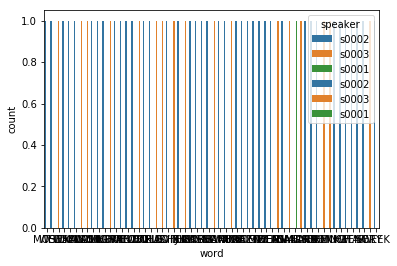

In [89]:
sns.countplot(x='word',data=t2data,hue='speaker')
plt.show()

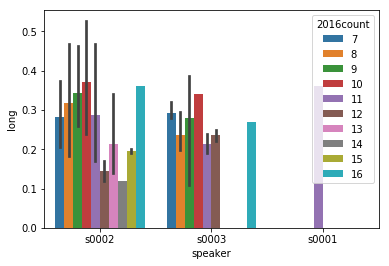

In [86]:
sns.barplot(x="speaker", y="long", hue="2016count", data=t2data)
plt.show()

# Describe
my dataframe is a tabular

In [ ]:
tdata.shape[0]

In [ ]:
tdata.describe(include='all')

In [ ]:
tdata[tdata['word']== 'DANISH']

In [ ]:
plt.figure(figsize=(10,6))
x=np.arange(14)+1 

In [ ]:
%%bash

pip install wordcloud

In [ ]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
wordcloud2 = WordCloud().generate(' '.join(tdata['word']))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [143]:
tdata = tdata.sort_values('2016count')

In [144]:
A = data['long'].mean()
#for i in data['long']:
#    if i > A:
#       print(i)
ndata = data[data['long'] > A]
print(ndata)

      Unnamed: 0        word  long speaker
0              0       HELLO  0.38   s0002
2              2       SHONE  0.31   s0002
3              3        LIKE  0.34   s0002
4              4     WELCOME  0.35   s0002
7              7     PROGRAM  0.44   s0002
9              9       TELLS  0.31   s0002
11            11         HOW  0.32   s0002
14            14     CHANGED  0.66   s0002
17            17        PAST  0.36   s0002
19            19        DAYS  0.43   s0002
21            21        WELL  0.36   s0002
22            22        THIS  0.31   s0002
23            23        WEEK  0.36   s0002
29            29      BRAZIL  0.57   s0002
32            32       WORLD  0.37   s0002
37            37       VIRUS  0.60   s0002
41            41     CAUSING  0.43   s0002
42            42       BRAIN  0.40   s0002
43            43      DAMAGE  0.42   s0002
45            45    CHILDREN  0.51   s0002
46            46       STILL  0.35   s0002
49            49        WOMB  0.41   s0002
51         

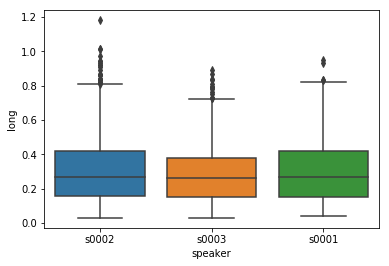

In [26]:
ax = sns.boxplot(x="speaker", y="long", data=data)
plt.show()

In [146]:
#try to find out what is the most long word in the procast
n2data = ndata.sort_values('long')
n2data
#why the longest time  word not the longest word?

,Unnamed: 0,word,long,speaker
1568,1568,QUICKLY,0.31,s0002
2921,2921,MOST,0.31,s0002
2557,2557,ITS,0.31,s0002
3113,3113,BELOW,0.31,s0002
2916,2916,FIGURE,0.31,s0002
3920,3920,LONGER,0.31,s0001
1805,1805,IS,0.31,s0002
2385,2385,WHETHER,0.31,s0001
3484,3484,BRITAIN,0.31,s0001
2550,2550,SETTING,0.31,s0002


In [147]:
fdata = data[data['long'] == data['long'].max()]
print(fdata)

      Unnamed: 0       word  long speaker
1806        1806  EXTREMELY  1.18   s0002


In [148]:
#data[data['word']=='EXTREMELY'],data[data['word']=='GOVERNMENT'],data[data['word']=='WORLD'],data[data['word']=='BRAIN'],
#data[data['word']=='CONCERN'],data[data['word']=='ECONOMY']

In [149]:
data[1806:1820]

,Unnamed: 0,word,long,speaker
1806,1806,EXTREMELY,1.18,s0002
1807,1807,SENSITIVE,0.83,s0002
1808,1808,IF,0.19,s0002
1809,1809,THERE,0.23,s0002
1810,1810,ARE,0.16,s0002
1811,1811,ISRAELI,0.49,s0002
1812,1812,SETTLEMENTS,0.62,s0002
1813,1813,IN,0.11,s0002
1814,1814,PARTICULAR,0.50,s0002
1815,1815,AREAS,0.53,s0002
